In [23]:
%matplotlib inline
import csv
import numpy as np

pcafields = ['PC' + str(x) for x in range(1,15)]

pca = list()
with open('nb/quarterlypca.csv', encoding = 'utf-8') as f:
    reader = csv.DictReader(f)
    for row in reader:
        newpcarow = []
        for field in pcafields:
            newpcarow.append(float(row[field]))
        pca.append(newpcarow)

pca = np.array(pca)

    

In [29]:
from scipy import spatial

def distance_matrix(pca):
    observations, dimensions = pca.shape
    distmat = np.zeros((observations, observations))
    for i in range(observations):
        for j in range(observations):
            dist = spatial.distance.cosine(pca[i], pca[j])
            distmat[i, j] = dist
    return distmat

d = distance_matrix(pca)    

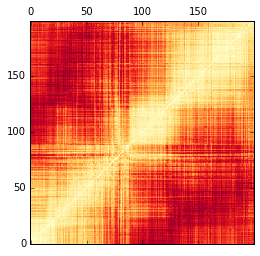

In [45]:
import matplotlib.pyplot as plt
plt.matshow(d, origin = 'lower', cmap = plt.cm.YlOrRd)
plt.show()

/Users/tunder/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


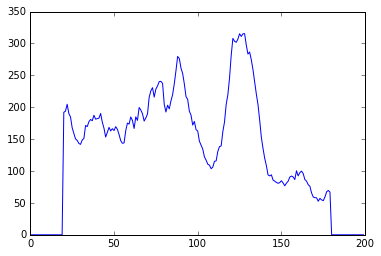

315.452941139


In [26]:
def make_foote(quart):
    tophalf = [-1] * quart + [1] * quart
    bottomhalf = [1] * quart + [-1] * quart
    foote = list()
    for i in range(quart):
        foote.append(tophalf)
    for i in range(quart):
        foote.append(bottomhalf)
    foote = np.array(foote)
    return foote

foote5 = make_foote(20)
# This gives us a Foote matrix with a five-year half-width.

def foote_novelty(distmat, foote):
    axis1, axis2 = distmat.shape
    assert axis1 == axis2
    distsize = axis1
    
    axis1, axis2 = foote.shape
    assert axis1 == axis2
    halfwidth = axis1 / 2
    
    novelties = []
    
    for i in range(distsize):
        
        start = i - halfwidth
        end = i + halfwidth
        
        if start < 0 or end > (distsize - 1):
            novelties.append(0)
        else:
            novelties.append(np.sum(foote * distmat[start: end, start: end]))
    
    return novelties

novelties = foote_novelty(d, foote5)
plt.plot(novelties)
plt.show()
print(np.max(novelties))

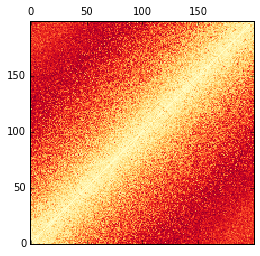

/Users/tunder/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


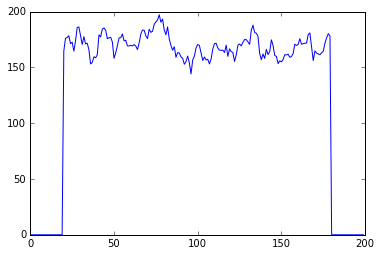

Five-year half-width:197.177197129


In [32]:
import random

def diagonal_permute(d):
    newmat = np.zeros((200, 200))
    for i in range(0, 200):
        indices1 = []
        indices2 = []
        values = []
        for x in range(200):
            y1 = x + i
            y2 = x - i
            if y1 >= 0 and y1 < 200:
                values.append(d[x, y1])
                indices1.append((x, y1))
            if y2 >= 0 and y2 < 200:
                indices2.append((x, y2))
        random.shuffle(values)
        assert len(values) == len(indices2)

        for idxtuple1, idxtuple2, value in zip(indices1, indices2, values):
            x, y = idxtuple1
            newmat[x, y] = value
            x, y = idxtuple2
            newmat[x, y] = value
    
    return newmat

newmat = diagonal_permute(d)
plt.matshow(newmat, origin = 'lower', cmap = plt.cm.YlOrRd)
plt.show()

novelties = foote_novelty(newmat, foote5)
plt.plot(novelties)
plt.show()
print("Five-year half-width:" + str(np.max(novelties)))

58.1419148216
44.0182975465


/Users/tunder/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


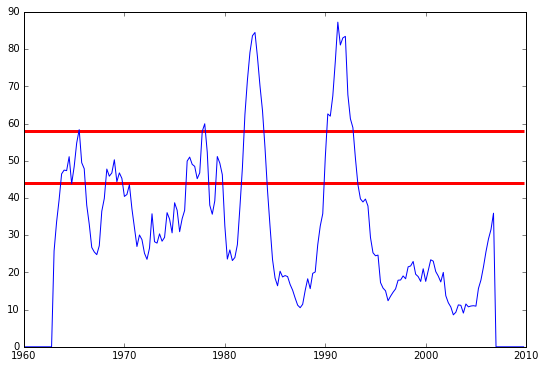

[ 1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8
  1.   1.   1.   1.   1.8  1.   1.4  1.8  1.   1.   1.8  1.8  1.8  1.8  1.8
  1.8  1.8  1.8  1.   1.   1.   1.   1.4  1.   1.4  1.8  1.8  1.8  1.8  1.8
  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8
  1.8  1.8  1.8  1.8  1.8  1.   1.   1.   1.   1.4  1.   1.4  1.8  1.   1.8
  1.8  1.8  1.   1.   1.   1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.   1.8  1.8
  1.8  1.8  1.8  1.8  1.8  1.8  1.4  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8
  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8
  1.   1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.   1.8  1.8
  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8
  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8
  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8
  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8
  1.8  1.8  

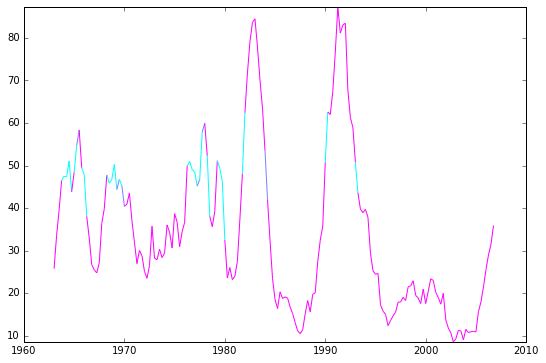

In [61]:
from matplotlib.collections import LineCollection

def permute_test(distmatrix, yrwidth):
    footematrix = make_foote(4 * yrwidth)
    actual_novelties = foote_novelty(distmatrix, footematrix)
    
    permuted_peaks = []
    for i in range(100):
        randdist = diagonal_permute(distmatrix)
        nov = foote_novelty(randdist, footematrix)
        permuted_peaks.append(np.max(nov))
    permuted_peaks.sort(reverse = True)
    threshold05 = permuted_peaks[4]
    threshold01 = permuted_peaks[0]
    threshold95 = permuted_peaks[94]
    threshold99 = permuted_peaks[99]
    print(threshold01)
    print(threshold99)
    
    significance = np.ones(len(actual_novelties))
    for idx, novelty in enumerate(actual_novelties):

        if novelty > threshold05 or novelty < threshold95:
            significance[idx] = 1.4
        if novelty > threshold01 or novelty < threshold99:
            significance[idx] = 1.8
    
    plt.rcParams["figure.figsize"] = [9.0, 6.0]
    years = []
    for i in range(200):
        years.append(1960 + i*0.25)
    plt.plot(years, actual_novelties)
    startpoint = years[0]
    endpoint = years[199]
    plt.hlines(threshold01, startpoint, endpoint, 'r', linewidth = 3)
    plt.hlines(threshold99, startpoint, endpoint, 'r', linewidth = 3)
    plt.show()
    
    return actual_novelties, significance

def colored_segments(novelties, significance):
    x = []
    y = []
    t = []
    idx = 0
    for nov, sig in zip(novelties, significance):
        if nov > 1:
            x.append(idx/4 + 1960)
            y.append(nov)
            t.append(sig)
        idx += 1
        
    x = np.array(x)
    y = np.array(y)
    t = np.array(t)
    
    points = np.array([x,y]).transpose().reshape(-1,1,2)
    segs = np.concatenate([points[:-1],points[1:]],axis=1)
    lc = LineCollection(segs, cmap=plt.get_cmap('cool'))
    lc.set_array(t)
    
    return lc, x, y

novelties, significance = permute_test(d, 3)
print(significance)
lc, x, y = colored_segments(novelties, significance)

plt.gca().add_collection(lc) # add the collection to the plot
plt.xlim(1960, 2010) # line collections don't auto-scale the plot
plt.ylim(y.min(), y.max())
plt.show()
    

In [33]:
permuted_peaks = []
for i in range(100):
    randdist = diagonal_permute(d)
    novelties = foote_novelty(randdist, foote5)
    permuted_peaks.append(np.max(novelties))

print(permuted_peaks)

[192.41939126335356, 197.38628971664752, 192.77833559338279, 190.86938616568807, 199.08058156522929, 195.53323000910819, 196.87745000898866, 188.94860027526113, 191.88678898735247, 193.18659761218171, 195.78878365700285, 195.80740973360821, 191.7718493102272, 196.36768294299247, 194.8137682120107, 190.22382036404798, 195.45354576390955, 194.0472867673617, 191.31295235002335, 196.47308322310499, 188.1408234192719, 191.12209722032713, 188.74766767815868, 195.87858932935737, 194.54723675511337, 184.75627318673682, 192.72038862838582, 191.93192184905001, 192.30488035774678, 193.93044531825134, 190.03591312092783, 195.60469060822584, 188.34297264926329, 195.45132138943927, 199.34055636004143, 192.37679517325304, 193.56681099315193, 192.19981417765405, 196.94986765916011, 196.46640726930184, 193.14428297624528, 203.30236221386903, 194.49552855938168, 193.60932105912156, 193.55949788961863, 189.95971186841115, 197.07279671899127, 189.85590058309603, 197.89382664091684, 189.64316611280123, 193

/Users/tunder/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


100
[206.95033397684301, 205.7373963127846, 204.51215303784647, 204.0442191194004, 203.30236221386903]


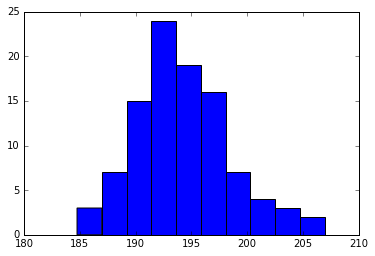

In [34]:
print(len(permuted_peaks))
permuted_peaks.sort(reverse = True)
print(permuted_peaks[0:5])
plt.hist(permuted_peaks)
plt.show()

/Users/tunder/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


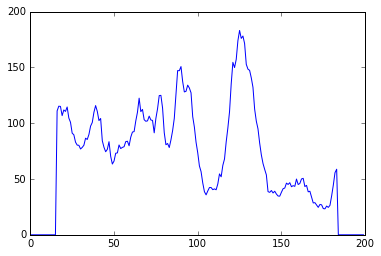

Four-year half-width:183.107990187


In [35]:
foote4 = make_foote(16)
novelties = foote_novelty(d, foote4)
plt.plot(novelties)
plt.show()
print("Four-year half-width:" + str(np.max(novelties)))

In [38]:
permuted_peaks = []
for i in range(100):
    randdist = diagonal_permute(d)
    novelties = foote_novelty(randdist, foote4)
    permuted_peaks.append(np.max(novelties))

print(len(permuted_peaks))
permuted_peaks.sort(reverse = True)
print(permuted_peaks[0:5])

100
[115.35996874435585, 113.22510522604469, 111.86719415802727, 110.02698991199168, 109.64363286122183]


/Users/tunder/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [12]:
foote4.shape

(32, 32)

In [13]:
with open('toptenfootes.csv', mode = 'w') as f:
    writer = csv.writer(f)
    for quarters in range(12, 40):
        thisfoote = make_foote(quarters)
        these_maxima = []
        for i in range(100):
            np.random.shuffle(randomized)
            rd = distance_matrix(randomized)
            novelties = foote_novelty(rd, thisfoote)
            these_maxima.append(np.max(novelties))
        these_maxima.sort(reverse = True)
        outrow = [quarters]
        outrow.extend(these_maxima[0:10])
        writer.writerow(outrow)
        print(outrow)

[12, 177.11792539211081, 150.13452801093143, 145.70233557442734, 144.27871624681828, 131.38659153582989, 129.03216478993772, 128.46901981441027, 124.52126297156678, 123.47369255308642, 122.48036173268147]


/Users/tunder/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


KeyboardInterrupt: 

In [ ]:
with open('realfootes.csv', mode='w', encoding = 'utf-8') as f:
    writer = csv.writer(f)
    for quarters in range(12, 40):
        thisfoote = make_foote(quarters)
        d = distance_matrix(pca)
        novelties = foote_novelty(d, thisfoote)
        outrow = [quarters]
        outrow.extend(novelties)
        writer.writerow(outrow)

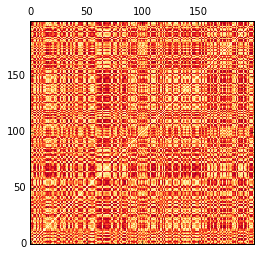

In [15]:
plt.matshow(randdist, origin = 'lower', cmap = plt.cm.YlOrRd)
plt.show()